In [1]:
import os

## switch to the root dir

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/6321_project')
os.listdir()

['processed_data',
 'trainers',
 'models',
 'data_processor',
 'data_loader',
 'jupyter',
 'loggers',
 'saved_models']

In [4]:
from data_processor.utils import load_numpy_arrays, numpy_to_tensor
from models.MusicLSTM import MusicLSTM
import trainers.SGD_trainer
from loggers.statistics_loggers import plot_numerical_arrays
import torch
from torch import nn


## Load preprocessed data

In [5]:
X_train, y_train, X_val, y_val = load_numpy_arrays(['data_train_X.npy','data_train_y.npy', 'data_val_X.npy','data_val_y.npy']
                  , path_prefix='processed_data/processed_waves/4-genres/')

In [6]:
X_train, y_train, X_val, y_val = numpy_to_tensor([X_train, y_train, X_val, y_val])

In [7]:
y_train = y_train.type(torch.int64)
y_val = y_val.type(torch.int64)

In [8]:
print(X_train.shape)
print(y_train.shape)

torch.Size([640, 501, 40])
torch.Size([640])


In [9]:
print(X_train[0])
print(y_train[0])

tensor([[-2.2604, -2.6280, -3.0352,  ..., -3.4321, -3.3666, -3.3074],
        [-2.5652, -3.0801, -3.3855,  ..., -2.7342, -2.6954, -2.6208],
        [-2.7137, -2.6825, -2.8931,  ..., -2.6997, -2.6482, -2.5789],
        ...,
        [-1.4595, -0.1884,  0.0382,  ..., -1.2723, -0.8131, -1.0031],
        [-1.1837, -0.1374,  0.1658,  ..., -1.1047, -0.7848, -0.9523],
        [-0.2428, -0.1665, -0.1290,  ..., -0.1786, -0.1607, -0.1630]])
tensor(1)


In [10]:
print(X_val.shape)
print(y_val.shape)

torch.Size([80, 501, 40])
torch.Size([80])


## Load model

1. define model under the folder models
2. import and define the model

In [11]:
model = MusicLSTM(input_size=40,
        hidden_size=80,
        output_size=4,
        num_layers=8,
        dropout=0.15,
        batch_first=True
    )

In [12]:
n_feat = X_train.shape[2]
n_time = X_train.shape[1]

In [13]:
#X_train = X_train[:, range(0, n_time + 1, 4), :]
#X_val = X_val[:, range(0, n_time + 1, 4), :]

In [14]:
X_a = X_train[:10]
pred = model(X_a)

## Define loss and optimizer

In [15]:
lr = 0.001
batch_size = 160
num_epoch = 100
model_name = 'LSTM'
saved_model_name = 'saved_models/saved_' + model_name + '_wave.pt'

In [16]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

## Train

use trainers.SGD_trainer.train or define a trainer

parameters of SGD_trainer.train
- model
- train_array: a tuple (X_train, y_train, X_val, y_val)
- loss
- optimizer
- batch_size
- num_epoch
- device

In [17]:
training_loss_array, training_accuracy_array, validation_loss_array, validation_accuracy_array = trainers.SGD_trainer.train(model, (X_train, y_train, X_val, y_val), loss, optimizer, batch_size=batch_size, num_epoch=num_epoch, device='cuda')

Epoch  0: loss on final training batch: 1.3890
training accuracy: 25.31% validation accuracy: 20.00%
Epoch  1: loss on final training batch: 1.3875
training accuracy: 25.31% validation accuracy: 20.00%
Epoch  2: loss on final training batch: 1.3779
training accuracy: 36.09% validation accuracy: 30.00%
Epoch  3: loss on final training batch: 1.3229
training accuracy: 43.75% validation accuracy: 47.50%
Epoch  4: loss on final training batch: 1.2182
training accuracy: 45.62% validation accuracy: 47.50%
Epoch  5: loss on final training batch: 1.1252
training accuracy: 46.88% validation accuracy: 48.75%
Epoch  6: loss on final training batch: 1.0389
training accuracy: 46.88% validation accuracy: 48.75%
Epoch  7: loss on final training batch: 1.0183
training accuracy: 47.03% validation accuracy: 42.50%
Epoch  8: loss on final training batch: 1.0167
training accuracy: 47.03% validation accuracy: 42.50%
Epoch  9: loss on final training batch: 0.9968
training accuracy: 47.50% validation accurac

## Plot

plot_numerical_arrays: plot multiple arrays with the same length

parameters:
- num_arrays: numerical arrays with the same length
- labels: labels of each array(with the same order of num_arrays)
- xlabel
- ylabel
- title

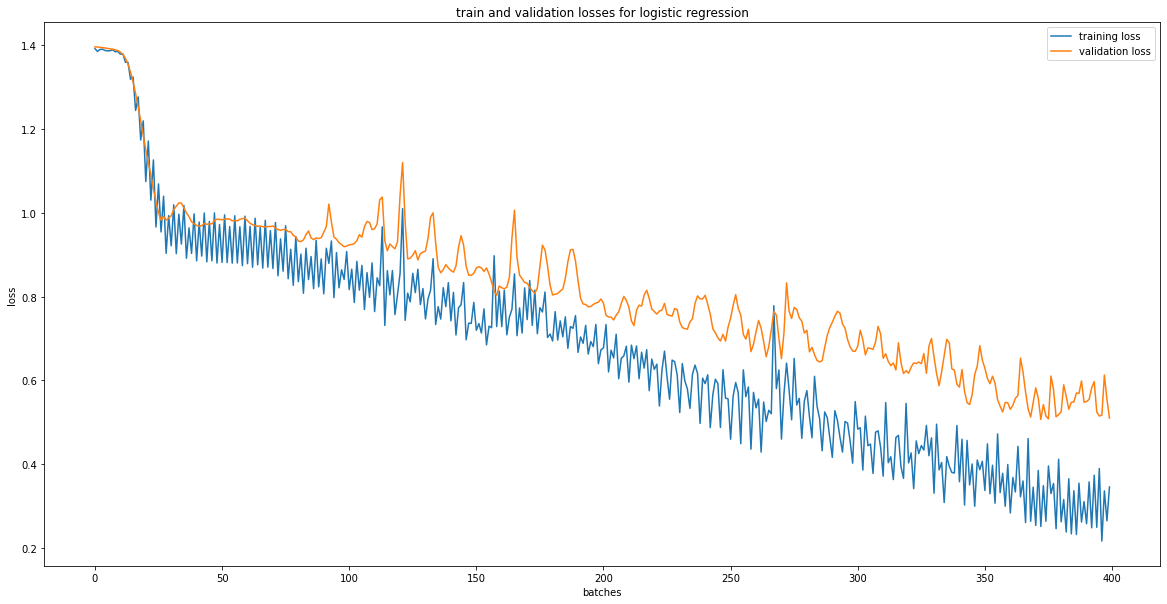

In [18]:
plot_numerical_arrays([training_loss_array, validation_loss_array], ['training loss', 'validation loss'], 
                      xlabel='batches', ylabel='loss', title='train and validation losses for ' + model_name)

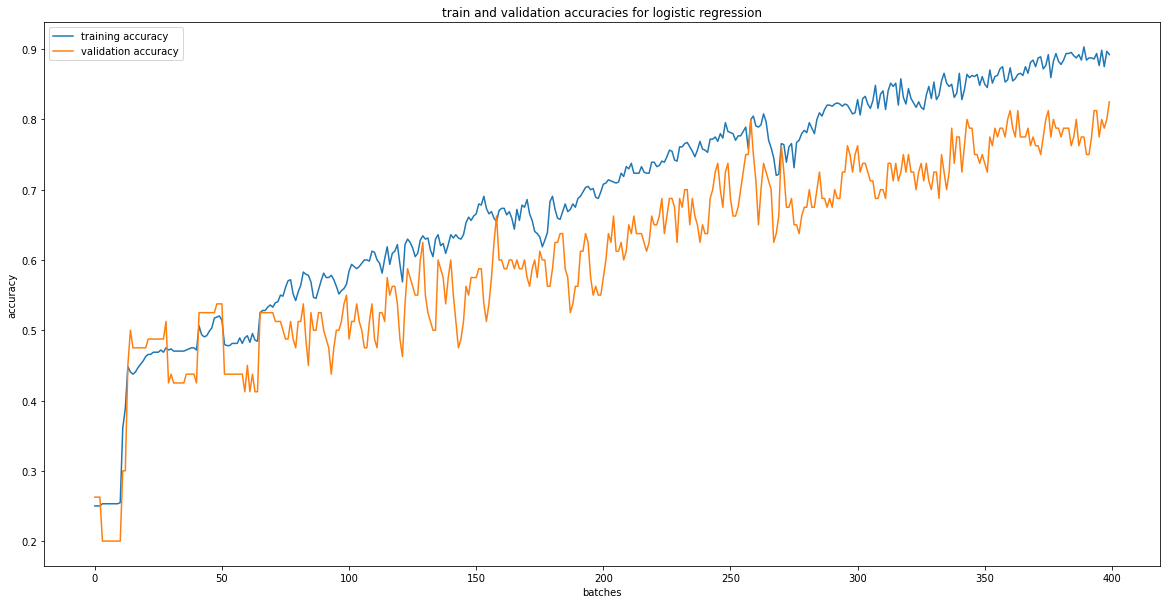

In [19]:
plot_numerical_arrays([training_accuracy_array, validation_accuracy_array], ['training accuracy', 'validation accuracy'], 
                      xlabel='batches', ylabel='accuracy', title='train and validation accuracies for logistic regression')

## Save model

Save model in 'saved_models/saved_modelname_wave.pt'

In [20]:
torch.save(model.state_dict(), saved_model_name)